# Data Analysis  for the paper 'Scrum RPG'
## To be published at JENUI2024
### By José Antonio Parejo Maestre japarejo@us.es

## Analysis of the Student´s satisfaction survey

### Data import 

Prior to any other data analysis, the files have been anonymized, removing any column that could provide information about the authors of the responses, and substituting them by an integer identifier.
The data of the surveys is provided  in X different files: 
 * Formulario Scrum RPG (Responses) - Form Responses 1: Which contains the data corresponding to the survey regarding Scrum RPG in the course 2022-2023

The files are provided in csv format  (with extension .csv), thus we use pandas to import  them. 
Additionally, we use  the packages 'plot_likert' and 'matplotlib' to generate charts.

In [1]:
import pandas as pd
import plot_likert as pl
import matplotlib.pyplot as plt


#===================#
#    DATA IMPORT    #
#===================#
df = pd.read_csv("data/Formulario Scrum RPG (Responses) - Form Responses 1.csv")
display(df)


,Timestamp,Introduzca su UVUS,¿Cuánto considera que ha aprendido utilizando nuestro producto?,¿Considera que nuestro producto es útil para la introducción a Scrum?,¿Le gustaría ver este tipo de herramientas en otras asignaturas?,Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2,¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?,¿Qué le ha parecido el juego?,¿Cómo valoraría la interfaz de usuario?,¿Cómo de bien cree que ha entendido las mecánicas del juego?,Indique cómo de difícil le ha parecido el juego,Feedback relativo a la interfaz de usuario,Feedback relativo a las mecánicas del juego,Feedback relativo a la complejidad del juego,Feedback relativo al aprendizaje que ofrece el juego,¿Algo más que quiera decir?
0,2/8/2023 13:27:20,adrgarpor,Algo,Sí,Sí,Tienen bastante relación,Sí,Aburrido,2,2,3,"Está claro que al ser un juego educativo, debe...",Si bien en un Daily Scrum no deberíamos titube...,NaN,"Bajo mi punto de vista, más que aprendizaje, o...",Considero un error la falta de multi-idioma. E...
1,2/4/2023 14:22:08,adrromflo,Algo,Sí,Sí,Tienen bastante relación,No,Algo entrenetido,2,3,2,NaN,NaN,NaN,NaN,NaN
2,2/6/2023 18:35:30,aitroddue,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,2,4,3,La interfaz al inicio es algo compleja y duran...,Las mecánicas en general están bien y se entie...,La única queja es que en la selección de dific...,Se comprende mejor la necesidad del cambio de ...,Me ha gustado que se introduzcan conceptos de ...
3,2/8/2023 1:50:14,alecamgal1,Algo,Sí,Sí,Tienen bastante relación,Sí,Algo entrenetido,4,5,1,Creo que es necesario que aparezca el nombre d...,NaN,NaN,NaN,NaN
4,2/3/2023 18:10:21,alecorgon1,Bastante,Sí,Sí,Es ideal para la asignatura,Sí,Estaba bien,3,4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2/5/2023 18:15:38,tadcabgom,Nada,No,No,Tienen alguna temática común,No,Aburrido,1,1,3,"Muy pobre, los texto se solapan y en pantallas...","Bastante aburrido, por lo menos en mi opinión,...",Muy difícil de entender al principio. Los tuto...,No creo que alguien que no sepa scrum lo apren...,No
81,2/4/2023 20:32:42,ursgarsan,Algo,No sé,Sí,Tienen alguna temática común,Sí,Algo entrenetido,2,1,3,NaN,NaN,NaN,NaN,NaN
82,2/6/2023 15:40:22,vicmorcon,Algo,No,No,Tienen bastante relación,No,Aburrido,2,2,2,"Algunos elementos de la UI, como el campo de t...",Estaría bien que los enemigos (las tareas) tuv...,Podrían asignarse automáticamente tareas al pr...,NaN,La aplicación me ha crasheado varias veces en ...
83,2/4/2023 18:22:03,vicruidel1,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,3,5,3,Muy intuitiva,Fácil de entender y de jugar,NaN,Ofrece un gran aprendizaje sobre Scrum y ayuda...,NaN


## Data Wrangling
Next we modify the structure of the data-frames, since office 365 introduces some spureous columns, and some of the columns names are not appropirate for data analysis and reporting.
Additionally, we fix some minor typos present in the response values of the second survey (2022).
First, we remove the spureous columns created by Microsoft Office Forms 365, and show the set of remaining columns in each dataset.

In [2]:
#=======================#
#    DATA WRANGLING     #
#=======================#
#------------------------#
#    COLUMN REMOVAL      #
#------------------------#
columnsToRemove=['Timestamp','Introduzca su UVUS']
df=df.drop(columns=columnsToRemove,errors='ignore')
print("Remaining columns in the dataset")
print(df.columns)


Remaining columns in the dataset
Index(['¿Cuánto considera que ha aprendido utilizando nuestro producto?',
       '¿Considera que nuestro producto es útil para la introducción a Scrum?',
       '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
       'Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2',
       '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?',
       '¿Qué le ha parecido el juego?',
       '¿Cómo valoraría la interfaz de usuario?',
       '¿Cómo de bien cree que ha entendido las mecánicas del juego?',
       'Indique cómo de difícil le ha parecido el juego',
       'Feedback relativo a la interfaz de usuario',
       'Feedback relativo a las mecánicas del juego',
       'Feedback relativo a la complejidad del juego',
       'Feedback relativo al aprendizaje que ofrece el juego',
       '¿Algo más que quiera decir?'],
      dtype='object')


Second, we rename and homogeinize the names of the columns in both datasets. Unfortunately, Microsoft Office Forms 365 does not respect the name of the question for the corresponding column of the dataset in most cases, thus we have to rename and homogeinize the names of the columns in both datasets. Apart, from such renaming, we check the columns with duplicated names in order to avoid inconsistences.

In [3]:
import collections
#------------------------#
#    COLUMN RENAMIG      #
#------------------------#
columnsToRename={'¿Considera que nuestro producto es útil para la introducción a Scrum?':'¿Considera que nuestro juego es útil para la introducción a Scrum?'}

print("Columns prior to the renaming of the dataset:")
print(df.columns)
print("Duplicated column names in the dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])
print("--------------------------------------------")
df=df.rename(columns=columnsToRename)
print("Columns after the renaming the dataset:")
print(df.columns)
print("Duplicated column names in the  dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])

Columns prior to the renaming of the dataset:
Index(['¿Cuánto considera que ha aprendido utilizando nuestro producto?',
       '¿Considera que nuestro producto es útil para la introducción a Scrum?',
       '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
       'Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2',
       '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?',
       '¿Qué le ha parecido el juego?',
       '¿Cómo valoraría la interfaz de usuario?',
       '¿Cómo de bien cree que ha entendido las mecánicas del juego?',
       'Indique cómo de difícil le ha parecido el juego',
       'Feedback relativo a la interfaz de usuario',
       'Feedback relativo a las mecánicas del juego',
       'Feedback relativo a la complejidad del juego',
       'Feedback relativo al aprendizaje que ofrece el juego',
       '¿Algo más que quiera decir?'],
      dtype='object')
Duplicated column names in the dataset:
[]
-------

We swap the order of some  columns  in order to get a consistent merged dataset.

In [4]:
#------------------------#
#    COLUMN SWAPPING     #
#------------------------#
columnsToSwap={}

#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

for x in columnsToSwap:
    print(x)
    print(columnsToSwap[x])
    df=swap_columns(df,x,columnsToSwap2021[x])

Finally, we fix some minor typos in the survey

In [7]:
#---------------------------------------#
#    TYPOS FIXING & CONCATENATION       #
#---------------------------------------#
# We fix some minor typos in the survey of 2022
#df2022=df2022.replace([' Muy insatisfecho/a'], 'Muy insatisfecho/a')
#df=pd.concat([df2021,df2022],ignore_index=True);
df

,¿Cuánto considera que ha aprendido utilizando nuestro producto?,¿Considera que nuestro juego es útil para la introducción a Scrum?,¿Le gustaría ver este tipo de herramientas en otras asignaturas?,Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2,¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?,¿Qué le ha parecido el juego?,¿Cómo valoraría la interfaz de usuario?,¿Cómo de bien cree que ha entendido las mecánicas del juego?,Indique cómo de difícil le ha parecido el juego,Feedback relativo a la interfaz de usuario,Feedback relativo a las mecánicas del juego,Feedback relativo a la complejidad del juego,Feedback relativo al aprendizaje que ofrece el juego,¿Algo más que quiera decir?
0,Algo,Sí,Sí,Tienen bastante relación,Sí,Aburrido,2,2,3,"Está claro que al ser un juego educativo, debe...",Si bien en un Daily Scrum no deberíamos titube...,NaN,"Bajo mi punto de vista, más que aprendizaje, o...",Considero un error la falta de multi-idioma. E...
1,Algo,Sí,Sí,Tienen bastante relación,No,Algo entrenetido,2,3,2,NaN,NaN,NaN,NaN,NaN
2,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,2,4,3,La interfaz al inicio es algo compleja y duran...,Las mecánicas en general están bien y se entie...,La única queja es que en la selección de dific...,Se comprende mejor la necesidad del cambio de ...,Me ha gustado que se introduzcan conceptos de ...
3,Algo,Sí,Sí,Tienen bastante relación,Sí,Algo entrenetido,4,5,1,Creo que es necesario que aparezca el nombre d...,NaN,NaN,NaN,NaN
4,Bastante,Sí,Sí,Es ideal para la asignatura,Sí,Estaba bien,3,4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Nada,No,No,Tienen alguna temática común,No,Aburrido,1,1,3,"Muy pobre, los texto se solapan y en pantallas...","Bastante aburrido, por lo menos en mi opinión,...",Muy difícil de entender al principio. Los tuto...,No creo que alguien que no sepa scrum lo apren...,No
81,Algo,No sé,Sí,Tienen alguna temática común,Sí,Algo entrenetido,2,1,3,NaN,NaN,NaN,NaN,NaN
82,Algo,No,No,Tienen bastante relación,No,Aburrido,2,2,2,"Algunos elementos de la UI, como el campo de t...",Estaría bien que los enemigos (las tareas) tuv...,Podrían asignarse automáticamente tareas al pr...,NaN,La aplicación me ha crasheado varias veces en ...
83,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,3,5,3,Muy intuitiva,Fácil de entender y de jugar,NaN,Ofrece un gran aprendizaje sobre Scrum y ayuda...,NaN


### Figures generation

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

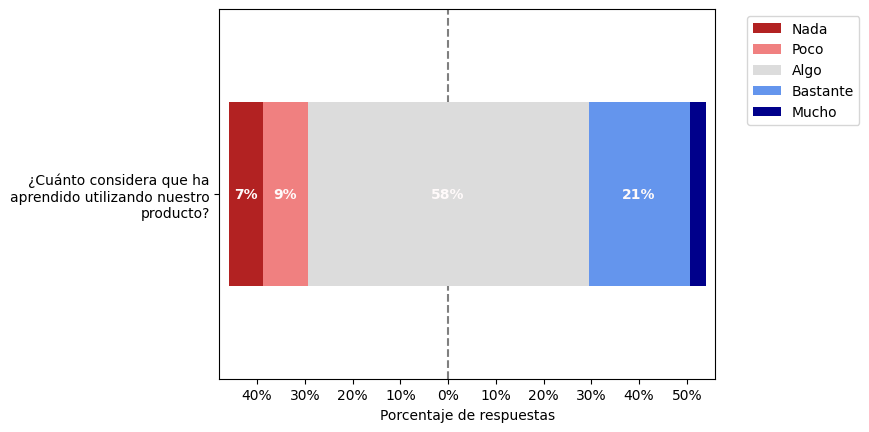

In [6]:
#================================#
#    LIKERT TEACHING ANALYSIS    #
#================================#
myscale = \
    ['Nada',
     'Poco',
     'Algo',
     'Bastante',
     'Mucho'
     ]
columns=[1]
myplot=pl.plot_likert(df[[
    '¿Cuánto considera que ha aprendido utilizando nuestro producto?'     
]], myscale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/CuantoConsideraQueHaAprendido.png',bbox_inches='tight',dpi=300)
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

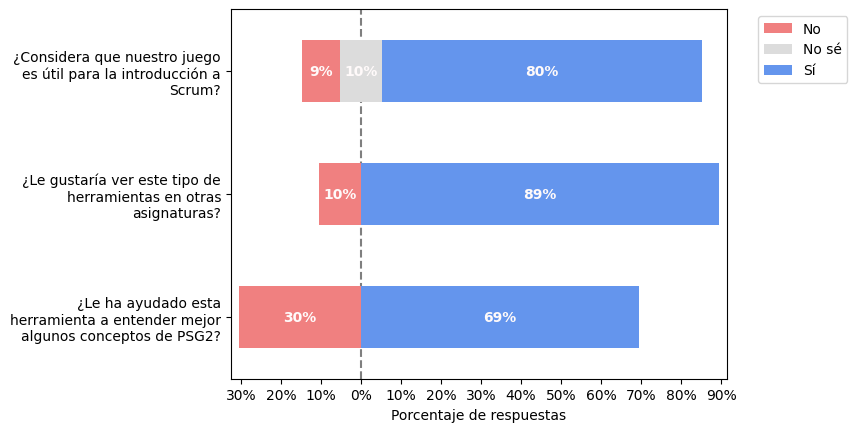

In [8]:
myscale = \
    ['','No',     
     'No sé',
     'Sí',''
     ]
columns=[1]
myplot=pl.plot_likert(df[[
    '¿Considera que nuestro juego es útil para la introducción a Scrum?',     
    '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
    '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?'
]], myscale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/UtilidadDelJuego.png',bbox_inches='tight',dpi=300)
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


<AxesSubplot: xlabel='Satisfacción con la formación recibida por apartados en ambos cursos'>

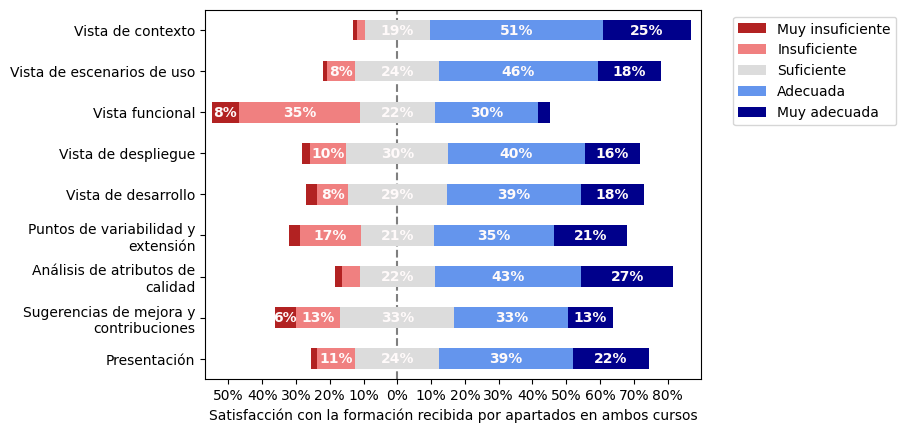

In [10]:
myplot=pl.plot_likert(df[[ 
    'Vista de contexto', 
    'Vista de escenarios de uso', 
    'Vista funcional',
    'Vista de despliegue', 
    'Vista de desarrollo',       
    'Puntos de variabilidad y extensión',
    'Análisis de atributos de calidad',
    'Sugerencias de mejora y contribuciones', 
    'Presentación'
]], myscale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Satisfacción con la formación recibida por apartados en ambos cursos')
myplot.get_figure().savefig('figs/SatisfaccionConLaFormacionPorApartado.png',bbox_inches='tight',dpi=300);
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Satisfacción con los elementos del proyecto en ambos cursos'>

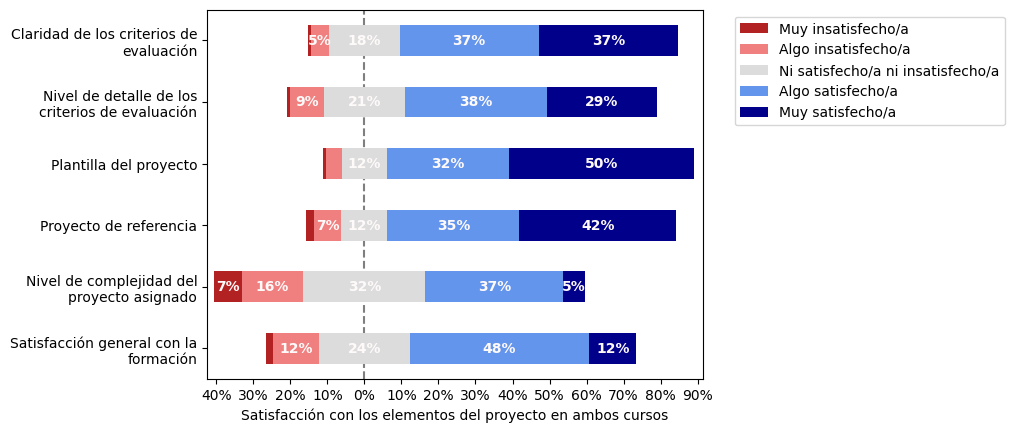

In [11]:
# Niveles de satisfacción en escala de likert:
satisfaction_scale = \
    ['Muy insatisfecho/a',
     'Algo insatisfecho/a',
     'Ni satisfecho/a ni insatisfecho/a',
     'Algo satisfecho/a',
     'Muy satisfecho/a']
df.replace(df['Claridad de los criterios de evaluación'].unique()[3],'Muy insatisfecho/a',inplace=True)

myplot=pl.plot_likert(df[[                          
                         'Claridad de los criterios de evaluación',
                          'Nivel de detalle de los criterios de evaluación',
                          'Plantilla del proyecto',
                          'Proyecto de referencia',
                          'Nivel de complejidad del proyecto asignado',
                          'Satisfacción general con la formación'
                         ]], 
                      satisfaction_scale, 
                      plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Satisfacción con los elementos del proyecto en ambos cursos')
myplot.get_figure().savefig('figs/SatisfaccionGeneralLikert.png',bbox_inches='tight',dpi=300);
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


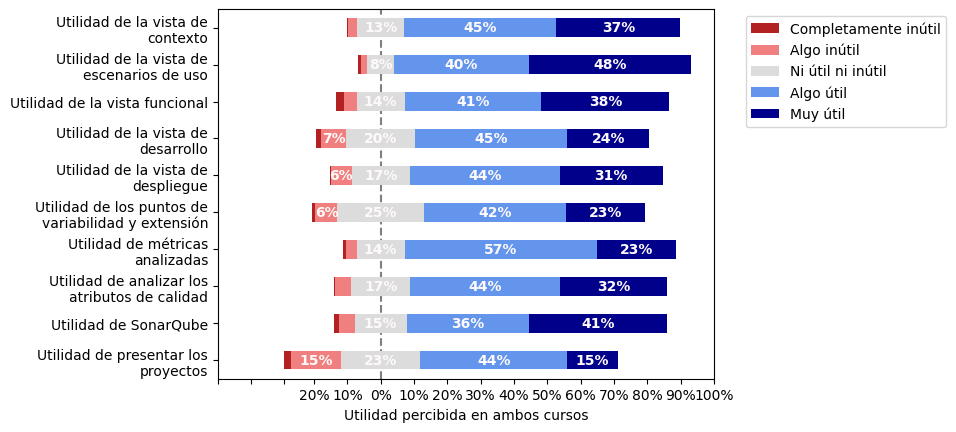

In [12]:
# Utility levels in likert scale:
utility_scale = \
    ['Completamente inútil',
     'Algo inútil',
     'Ni útil ni inútil',
     'Algo útil',
     'Muy útil']
df=df.replace('Algo útiles','Algo útil')
df=df.replace('Algo útil\n','Algo útil')
df=df.replace('Algo inútiles','Algo inútil',)
df=df.replace('Algo inútil\n','Algo inútil',)
df=df.replace('Ni útiles ni inútiles','Ni útil ni inútil')
df=df.replace('Muy útiles','Muy útil')
df=df.replace('Muy útil\n','Muy útil')
df=df.replace('Completamente inútiles','Completamente inútil')
df=df.replace('Completamente inútil\n','Completamente inútil')
myplot=pl.plot_likert(df[[                          
                            'Utilidad de la vista de contexto',
                            'Utilidad de la vista de escenarios de uso',
                            'Utilidad de la vista funcional',
                            'Utilidad de la vista de desarrollo',
                            'Utilidad de la vista de despliegue',
                            'Utilidad de los puntos de variabilidad y extensión',                                                        
                            'Utilidad de métricas analizadas',
                            'Utilidad de analizar los atributos de calidad',
                            'Utilidad de SonarQube',
                            'Utilidad de presentar los proyectos'
                         ]], 
                      utility_scale, 
                      plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.set_xlim([-10,90])
extraticks=[0,-10,-20]
#print(myplot.get_xticklabels())
myplot.xaxis.set_label_text('Utilidad percibida en ambos cursos')
myplot=myplot.set_xticks(list(myplot.get_xticks()) + extraticks)
#myplot=myplot.set_xticklabels(list(myplot.get_xticklabels())+["30%","40%","50%"])
plt.savefig('figs/UtilidadPorElementosDelProyectoLikert.png',bbox_inches='tight',dpi=300);
myplot

([<matplotlib.patches.Wedge at 0x21a57a0fb50>,
 [Text(0.21169675124344134, 1.079437115126663, 'Algo satisfecho/a'),
  Text(-1.0093420155865644, -0.4372970335728924, 'Ni satisfecho/a ni insatisfecho/a'),
  Text(0.14162286648317757, -1.0908450686000686, 'Algo insatisfecho/a'),
  Text(0.9565482540906438, -0.5431532358332603, 'Muy satisfecho/a'),
  Text(1.0989815199813633, -0.04732461029372095, ' Muy insatisfecho/a')],
 [Text(0.11547095522369526, 0.5887838809781798, '43.8%'),
  Text(-0.5505501903199442, -0.2385256546761231, '25.3%'),
  Text(0.07724883626355139, -0.5950064010545828, '15.8%'),
  Text(0.5217535931403511, -0.29626540136359647, '13.7%'),
  Text(0.5994444654443799, -0.02581342379657506, '1.4%')])

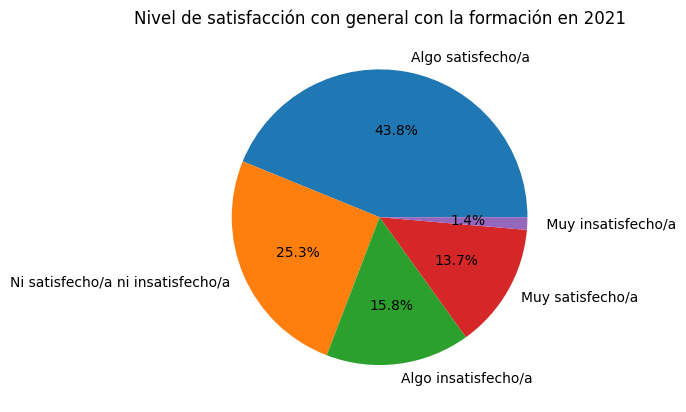

In [13]:
values=df2021['Satisfacción general con la formación'].value_counts()
values
plt.title('Nivel de satisfacción con general con la formación en 2021')
myplot=plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')
plt.savefig('figs/SatisfaccionGeneral2021.png')
myplot

([<matplotlib.patches.Wedge at 0x21a57a71fd0>,
 [Text(-0.15376940262567576, 1.0891992337566818, 'Algo satisfecho/a'),
  Text(-0.585235253022711, -0.9313966387202842, 'Ni satisfecho/a ni insatisfecho/a'),
  Text(0.558882882939257, -0.9474438891868504, 'Muy satisfecho/a'),
  Text(1.0040615870604392, -0.4492886927017777, 'Algo insatisfecho/a'),
  Text(1.096107642370053, -0.09245559116659274, 'Muy insatisfecho/a')],
 [Text(-0.08387421961400494, 0.59410867295819, '54.5%'),
  Text(-0.31921922892147864, -0.508034530211064, '23.2%'),
  Text(0.30484520887595834, -0.5167875759201002, '11.6%'),
  Text(0.5476699565784213, -0.24506655965551508, '8.0%'),
  Text(0.5978768958382107, -0.05043032245450513, '2.7%')])

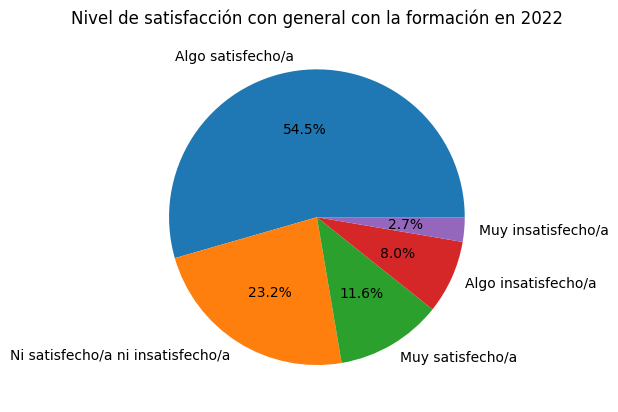

In [14]:
# We fix a minor typo in the survey
values=df2022['Satisfacción general con la formación'].value_counts()
values
plt.title('Nivel de satisfacción con general con la formación en 2022')
myplot=plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')
plt.savefig('figs/SatisfaccionGeneral2022.png')
myplot

([<matplotlib.patches.Wedge at 0x21a57ce02e0>,
 [Text(0.053556392968895514, 1.0986954595210456, 'Algo satisfecho/a'),
  Text(-0.8623955342118836, -0.68284254595873, 'Ni satisfecho/a ni insatisfecho/a'),
  Text(0.2911645621725181, -1.060765382982913, 'Muy satisfecho/a'),
  Text(0.9592543184808255, -0.5383596868970476, 'Algo insatisfecho/a'),
  Text(1.0979618802151307, -0.06693063270621935, 'Muy insatisfecho/a')],
 [Text(0.029212577983033915, 0.5992884324660248, '48.4%'),
  Text(-0.4703975641155728, -0.37245957052294354, '24.4%'),
  Text(0.15881703391228258, -0.5785992998088615, '12.8%'),
  Text(0.5232296282622685, -0.29365073830748045, '12.4%'),
  Text(0.5988882982991622, -0.03650761783975601, '1.9%')])

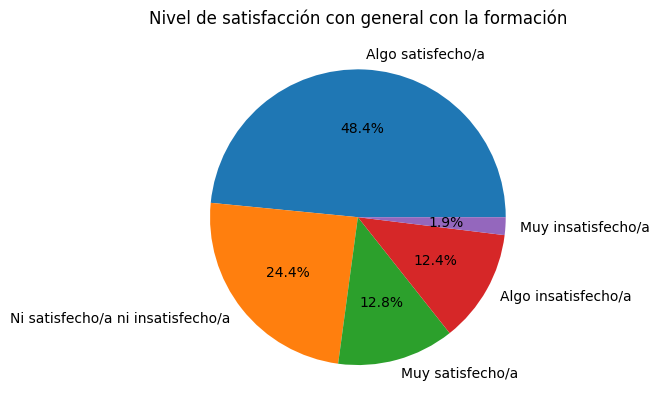

In [15]:
# We fix a minor typo in the survey
df['Satisfacción general con la formación'] = df['Satisfacción general con la formación'].replace([' Muy insatisfecho/a'], 'Muy insatisfecho/a')
values=df['Satisfacción general con la formación'].value_counts()
values
plt.title('Nivel de satisfacción con general con la formación')
myplot=plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')
plt.savefig('figs/SatisfaccionGeneral.png')
myplot

1    106
2     84
0     53
3     14
4      1
Name: diferencia-github, dtype: int64


([<matplotlib.patches.Wedge at 0x21a57d4f1f0>,
 [Text(0.30405940102982504, 1.057141372118878, '1'),
  Text(-0.9843281979640973, -0.49101730997262505, '2'),
  Text(0.5844249098691204, -0.9319053196137849, '0'),
  Text(1.0791891807098095, -0.21295706665638103, '3'),
  Text(1.099918450087908, -0.013394146341376137, '4')],
 [Text(0.16585058237990455, 0.5766225666102971, '41.1%'),
  Text(-0.5369062897985984, -0.2678276236214318, '32.6%'),
  Text(0.3187772235649748, -0.5083119925166099, '20.5%'),
  Text(0.5886486440235323, -0.11615839999438964, '5.4%'),
  Text(0.599955518229768, -0.007305898004386983, '0.4%')])

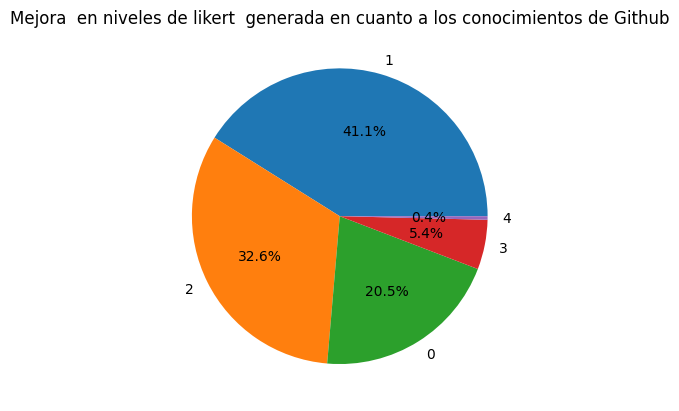

In [16]:
replacer = {'Muy insuficiente': 1, 'Insuficiente': 2,
            'Suficiente': 3,
            'Adecuado': 4,'Adecuado ': 4, 'Avanzado': 5}

df["github-antes"]=df["Conocimientos de Github antes"].replace(replacer)
df["github-despues"]=df["Conocimientos de Github después"].replace(replacer)
df["diferencia-github"]=df["github-despues"]-df["github-antes"]
values=df['diferencia-github'].value_counts()
print(values)
plt.title('Mejora  en niveles de likert  generada en cuanto a los conocimientos de Github')
plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')

Sí    140
No    118
Name: ¿Fuisteis capaces de ejecutar el proyecto y ver su funcionamiento en la práctica?, dtype: int64


([<matplotlib.patches.Wedge at 0x21a57daac40>,
 [Text(-0.14689815977840306, 1.0901472059560209, 'Sí'),
  Text(0.14689826184534988, -1.0901471922024177, 'No')],
 [Text(-0.08012626897003804, 0.594625748703284, '54.3%'),
  Text(0.0801263246429181, -0.5946257412013187, '45.7%')])

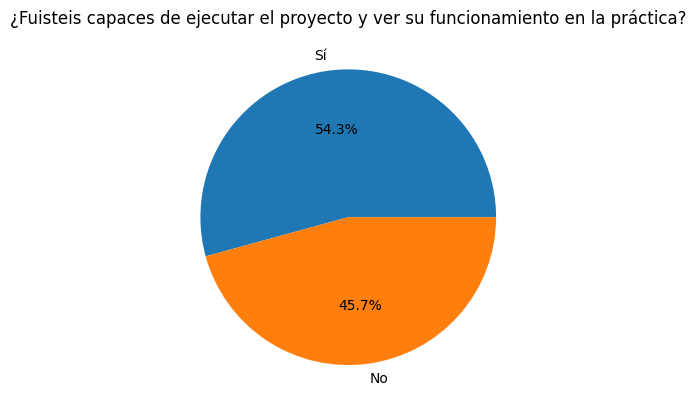

In [17]:
values=df['¿Fuisteis capaces de ejecutar el proyecto y ver su funcionamiento en la práctica?'].value_counts()
print(values)
plt.title('¿Fuisteis capaces de ejecutar el proyecto y ver su funcionamiento en la práctica?')
plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')

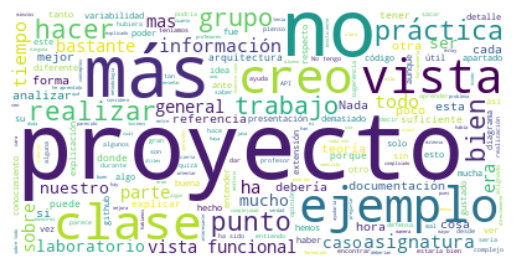

In [18]:
from wordcloud import WordCloud
import numpy as np
import csv
suggestions=df["Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto del proyecto de arquitectura."].replace('', np.nan).dropna()
stopwords = ["o","a","e","y","de","en","que","el","al","lo","los","la","las","mi","me","en","muy","cómo","como","para","por","del","un","una","se","es","con","pero","además","Además","También","ya"]
text = " ".join(suggestions)
wordcloud = WordCloud(collocations = True, background_color="white", stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('figs/WordCloud.png',bbox_inches='tight',dpi=300)
plt.show()

## Analysis of the marks of the academical courses 2019-2020, 2020-2021, and 2021-2022

Next we analyze the marks of the students during the course prior to the application of the new methodology and the two courses where the new methodology was applied.

### Data loading
We load three anonymized excel files with the marks obtained by the students in each course.

In [19]:
notas2020 = pd.read_excel("data/Notas-AISS-2020.xlsx")
notas2021 = pd.read_excel("data/Notas-AISS-2021.xlsx")
notas2022 = pd.read_excel("data/Notas-AISS-2022.xlsx")
display(notas2020)
display(notas2021)
display(notas2022)

,TEST,NOTA TEORÍA,PROYECTO,FINAL SIN MINIMA,FINAL,ACTA JUNIO,TEST SEPT,NOTA TEORÍA SEPT,DEFENSA SEPT,PROYECTO SEPT,...,FINAL SEPT,ACTA SEPTIEMBRE,TEST DIC,TEORÍA DIC,DEFENSA DIC,PRÁCTICAS DIC,FINAL SM DIC,FINAL DIC,ACTA DICIEMBRE,NOTA FINAL
0,3.5,3.5,4.5,4.1,4.1,SUSPENSO,4.5,4.5,9.2,9.2,...,7.3,NOTABLE,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,7.3
1,7.5,7.5,7.5,7.5,7.5,NOTABLE,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,7.5
2,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,0.0
3,4.5,4.5,3.0,3.6,3.6,SUSPENSO,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,3.6
4,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,8.0,8.0,9.6,9.0,9.0,SOBRESALIENTE,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,9.0
307,5.0,5.0,6.6,6.0,6.0,APROBADO,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,6.0
308,7.0,7.0,9.0,8.2,8.2,NOTABLE,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,8.2
309,7.5,7.5,8.0,7.8,7.8,NOTABLE,NaN,NaN,NaN,NaN,...,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,7.8


,TEST ARQUITECTURA,TEST INTEGRACIÓN,PROYECTO ARQUITECTURA,PROYECTO INTEGRACIÓN,FINAL SIN MINIMA,FINAL,ACTA JUNIO,PRESENTADO,TEST ARQUITECTURA SEPT,TEST INTEGRACIÓN SEPT,...,ACTA SEPTIEMBRE,PRESENTADO DIC,TEST ARQUITECTURA DIC,TEST INTEGRACIÓN DIC,PROYECTO ARQUITECTURA DIC,PROYECTO INTEGRACIÓN DIC,FINAL SM DIC,FINAL DIC,ACTA DICIEMBRE,NOTA FINAL
0,4.2,5.6,7.7,7.45,6.5,6.5,APROBADO,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,6.5
1,4.4,6.2,5.7,7.80,6.2,6.2,APROBADO,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,6.2
2,8.6,3.4,8.0,8.50,7.4,7.4,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,7.4
3,7.2,6.2,8.7,7.60,7.6,7.6,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,7.6
4,7.0,6.6,8.7,10.00,8.3,8.3,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,4.2,8.0,8.3,7.70,7.2,7.2,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,7.2
262,NaN,NaN,NaN,NaN,0.0,0.0,NO PRESENTADO,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,0.0
263,3.6,8.0,8.3,7.00,6.9,7.0,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,7.0
264,4.4,10.0,9.0,7.70,7.9,7.9,NOTABLE,NO,0.0,0.0,...,NO PRESENTADO,NO,0.0,0.0,0.0,0.0,0.0,NaN,NO PRESENTADO,7.9


,TEST ARQUITECTURA,TEST INTEGRACIÓN,PROYECTO ARQUITECTURA,PROYECTO INTEGRACIÓN,FINAL SIN MINIMA,FINAL,ACTA JUNIO,TEST ARQUITECTURA SEPT,TEST INTEGRACIÓN SEPT,PROYECTO ARQUITECTURA SEPT,...,FINAL SEPT,ACTA SEPTIEMBRE,TEST ARQUITECTURA DIC,TEST INTEGRACIÓN DIC,PROYECTO ARQUITECTURA DIC,PROYECTO INTEGRACIÓN DIC,FINAL SM DIC,FINAL DIC,ACTA DICIEMBRE,NOTA FINAL
0,7.2,7.2,9.0,6.00,7.4,7.4,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,7.4
1,8.6,9.0,7.8,9.64,8.8,8.8,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,8.8
2,7.0,8.0,7.2,7.00,7.3,7.3,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,7.3
3,7.6,9.0,7.8,8.75,8.3,8.3,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,8.3
4,9.0,6.6,6.5,8.75,7.7,7.7,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,6.2,4.8,7.5,4.00,5.7,5.7,APROBADO,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,5.7
217,10.0,8.6,6.6,8.34,8.2,8.2,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,8.2
218,9.0,7.6,7.0,6.84,7.5,7.5,NOTABLE,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,7.5
219,4.6,7.6,4.5,7.44,6.0,6.0,APROBADO,0.0,0.0,0.0,...,0.0,NO PRESENTADO,0.0,NaN,0.0,NaN,0.0,0.0,NO PRESENTADO,6.0


### Figures generation

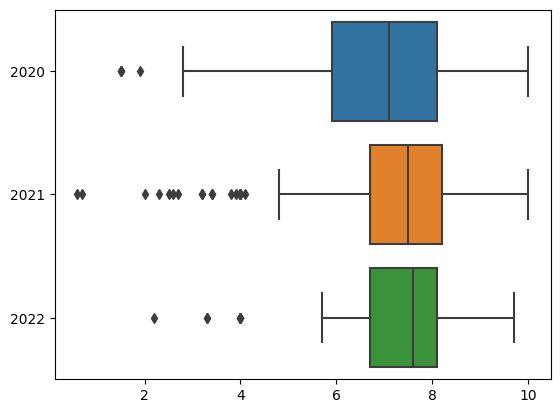

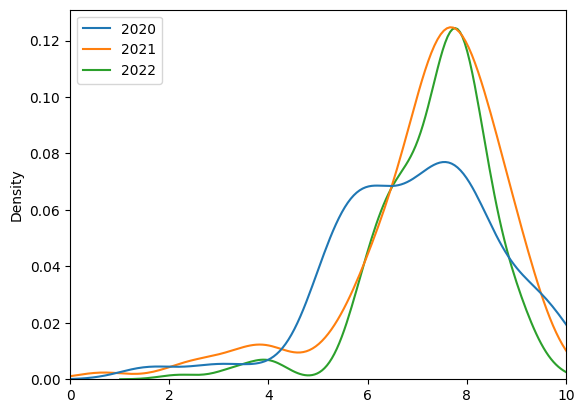

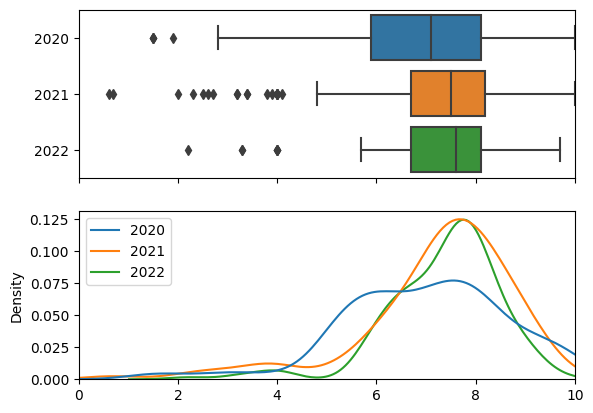

In [47]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

notafinal2020=notas2020["NOTA FINAL"].dropna()
notafinal2020=notafinal2020[notafinal2020 != 0.0]

notafinal2021=notas2021["NOTA FINAL"].dropna()
notafinal2021=notafinal2021[notafinal2021 != 0.0]


notafinal2022=notas2022["NOTA FINAL"].dropna()
notafinal2022=notafinal2022[notafinal2022 != 0.0]


notas=[notafinal2020,notafinal2021,notafinal2022]
notasDict={"2020":notafinal2020,"2021":notafinal2021,"2022":notafinal2022}
#fig,ax=plt.subplots()
#plt.boxplot(notas, labels=["2020","2021","2022"])
#ax.yaxis.set_minor_locator(MultipleLocator(1))
sns.boxplot(data=pd.DataFrame(notasDict),orient="h")
plt.savefig('figs/Notas.png',bbox_inches='tight',dpi=300)
plt.show()


import seaborn as sns

sns.kdeplot(notasDict)
plt.xlim(0, 10)
plt.savefig('figs/DisbribucionesNotas.png',bbox_inches='tight',dpi=300)
plt.show()


f, (ax_box, ax_kde) = plt.subplots(2, sharex=True)
sns.boxplot(data=pd.DataFrame(notasDict),orient="h",ax=ax_box)
sns.kdeplot(notasDict,ax=ax_kde)
ax_box.set(xlabel='')
plt.xlim(0, 10)
plt.savefig('figs/DistribucionesYBoxplotNotasCombinadas.png',bbox_inches='tight',dpi=300)
plt.show()



### Statistical tests on the differences  of  the distributions

#### Test assumptions: Normality 

In [21]:
from scipy.stats import shapiro

display(shapiro(notafinal2020))
display(shapiro(notafinal2021))
display(shapiro(notafinal2022))

ShapiroResult(statistic=0.9624664783477783, pvalue=1.7821746951085515e-05)

ShapiroResult(statistic=0.8748446702957153, pvalue=2.6798048914471184e-13)

ShapiroResult(statistic=0.9128122329711914, pvalue=2.9245013077883186e-09)

Thus our results are not normal! However, appart from the recommended approach in this case, non-parametic tests (specifically we use Mann-Withney U tests) we will perform also parametric tests (in this case Welch's test).

In [22]:
from pingouin import ttest
from pingouin import mwu
from scipy.stats import wilcoxon


display("Differences beetween marks in 2020 and in 2021 (Mann-Withney U test)")
display(mwu(notafinal2020, notafinal2021))
display("Differences beetween marks in 2020 and in 2022 (Mann-Withney U test)")
display(mwu(notafinal2020, notafinal2022))

differences2020to2021=ttest(notafinal2020, notafinal2021, correction = True)
differences2020to2022=ttest(notafinal2020, notafinal2022, correction = True)
display("Differences beetween marks in 2020 and in 2021 (Welch's test)")
display(differences2020to2021)
display("Differences beetween marks in 2020 and in 2022 (Welch's test)")
display(differences2020to2022)


'Differences beetween marks in 2020 and in 2021 (Mann-Withney U test)'

,U-val,alternative,p-val,RBC,CLES
MWU,22673.0,two-sided,0.007962,0.143122,0.428439


C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


'Differences beetween marks in 2020 and in 2022 (Mann-Withney U test)'

,U-val,alternative,p-val,RBC,CLES
MWU,17494.0,two-sided,0.00499,0.160718,0.419641


"Differences beetween marks in 2020 and in 2021 (Welch's test)"

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.789252,443.951779,two-sided,0.074256,"[-0.57, 0.03]",0.167611,0.487,0.433417


"Differences beetween marks in 2020 and in 2022 (Welch's test)"

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.74239,381.622276,two-sided,0.006387,"[-0.66, -0.11]",0.26612,4.045,0.764365
